In [97]:
import graphlab

In [98]:
import random

In [99]:
import math

In [100]:
import numpy

In [101]:
from matplotlib import pyplot as plt
%matplotlib inline

In [102]:
random.seed(98103)
n=30
x=graphlab.SArray([random.random() for i in range(n)]).sort()

In [103]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

In [104]:
y = x.apply(lambda x: math.sin(4*x))

In [105]:
y

dtype: float
Rows: 30
[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.25597249131754973, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]

In [106]:
random.seed(1)

In [107]:
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])

In [108]:
y = y+e

In [109]:
data = graphlab.SFrame({'X1':x,'Y':y})

In [110]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [111]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [112]:
def regressao_polinomial_cume(data, deg, l2_penalty):
    model =graphlab.linear_regression.create(polynomial_features(data,deg),
    target='Y', l2_penalty=l2_penalty, validation_set=None,verbose=False)
    return model

In [113]:
def print_coefficients(model):
    deg=len(model.coefficients['value'])-1
    w=list(model.coefficients['value'])
    
    print 'Coeficientes de primeiro grau '+str(deg)+':'
    w.reverse()
    print numpy.poly1d(w)

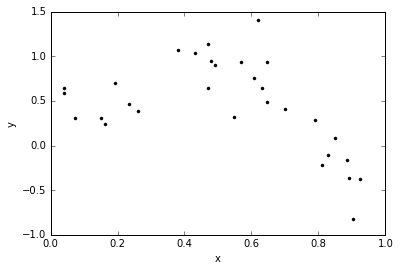

In [114]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

In [115]:
def plot_predicoes(data, model):
    plot_data(data)
    deg = len(model.coefficients['value'])-1

    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))

    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [116]:
model = regressao_polinomial_cume(data, deg=16,l2_penalty=1e-25)
print_coefficients(model)

Coeficientes de primeiro grau 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


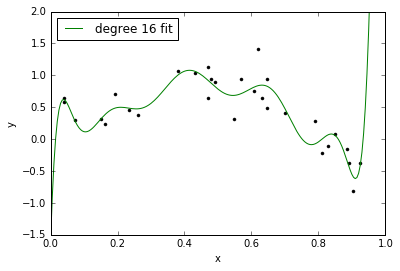

In [117]:
plot_predicoes(data,model)

In [118]:
model = regressao_polinomial_cume(data, deg=16,l2_penalty=100)
print_coefficients(model)

Coeficientes de primeiro grau 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


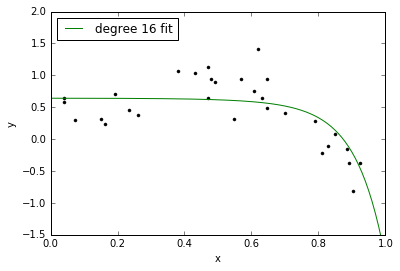

In [119]:
plot_predicoes(data,model)

In [120]:
def loo(data, deg, l2_penalty_values):

    data = polynomial_features(data, deg)

    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)

    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y',l2_penalty=l2_penalty,validation_set=None,verbose=False)

            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()

        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
    return l2_penalty_mse,best_l2_penalty

lambda = 1.00e-25
Coeficientes de primeiro grau 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


lambda = 1.00e-10
Coeficientes de primeiro grau 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


lambda = 1.00e-06
Coeficientes 

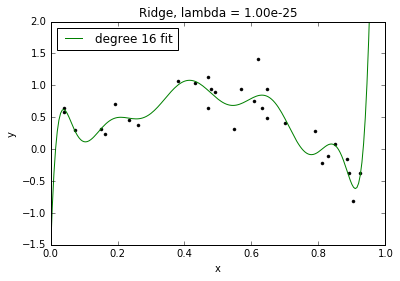

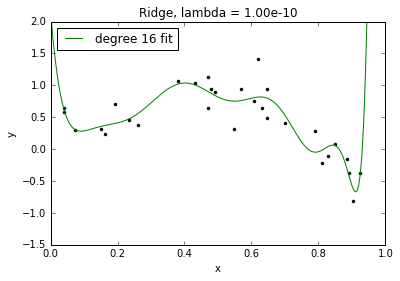

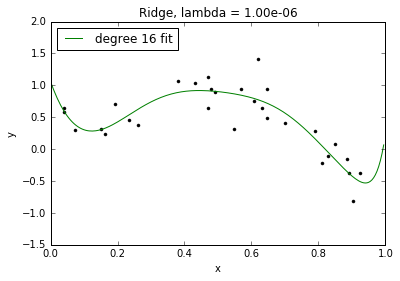

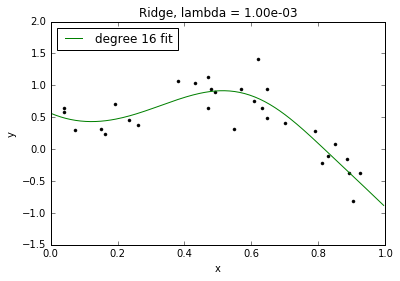

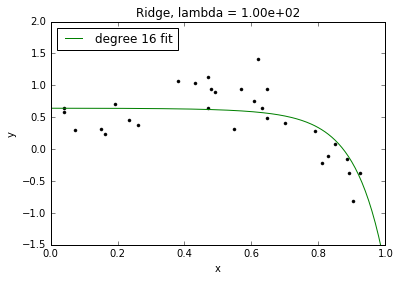

In [121]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = regressao_polinomial_cume(data, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_predicoes(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

In [122]:
def loo(data, deg, l2_penalty_values):
    
    data = polynomial_features(data, deg)
    
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [123]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [124]:
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

In [125]:
best_l2_penalty

0.12915496650148839

lambda = 1.29e-01
Coeficientes de primeiro grau 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918




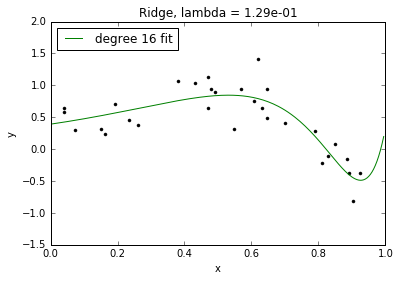

In [126]:
 model = regressao_polinomial_cume(data, deg=16, l2_penalty=best_l2_penalty)
 print 'lambda = %.2e' % best_l2_penalty
 print_coefficients(model)
 print '\n'
 plt.figure()
 plot_predicoes(data,model)
 plt.title('Ridge, lambda = %.2e' % best_l2_penalty)

<h1>Atividade 02</h1>

In [132]:
at2k5 = graphlab.SFrame.copy(data[:5])
at2k10 = graphlab.SFrame.copy(data[:10])

In [133]:
l2_penalty_mse_at2k5,best_l2_penalty_at2k5 = loo(at2k5, 16, l2_penalty_values)
l2_penalty_mse_at2k10,best_l2_penalty_at2k10 = loo(at2k10, 16, l2_penalty_values)

In [157]:
print 'Mse k5: %s\n'% l2_penalty_mse_at2k5
print 'Best k5:%s'%best_l2_penalty_at2k5

Mse k5: [0.16921303766278104, 0.05669250795611536, 0.026751434010378765, 0.02509639008717912, 0.040708693596275526, 0.043062940863643484, 0.04313500127276333, 0.04313701191339359, 0.043137067864944034, 0.04313706942183256]

Best k5:4.64158883361


lambda = 1.29e-01
Coeficientes de primeiro grau 16:
            16            15            14           13         12
-0.0001785 x  - 0.001003 x  - 0.005531 x  - 0.02973 x  - 0.154 x 
           11         10         9      8       7        6         5
 - 0.7543 x  - 3.356 x  - 12.21 x - 21 x + 199 x + 2891 x + 577.6 x
          4         3         2
 + 63.62 x - 7.904 x - 7.111 x - 1.981 x + 0.6424


lambda = 1.29e-01
Coeficientes de primeiro grau 16:
            16            15            14           13         12
-0.0001785 x  - 0.001003 x  - 0.005531 x  - 0.02973 x  - 0.154 x 
           11         10         9      8       7        6         5
 - 0.7543 x  - 3.356 x  - 12.21 x - 21 x + 199 x + 2891 x + 577.6 x
          4         3         2
 + 63.62 x - 7.904 x - 7.111 x - 1.981 x + 0.6424


lambda = 1.29e-01
Coeficientes de primeiro grau 16:
            16            15            14           13         12
-0.0001785 x  - 0.001003 x  - 0.005531 x  - 0.02973 x  - 0.154 x 
   

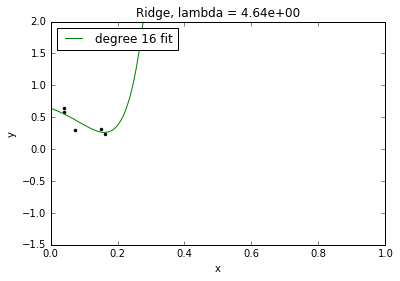

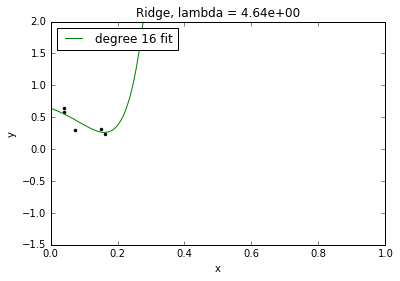

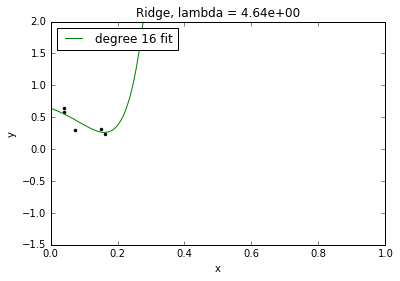

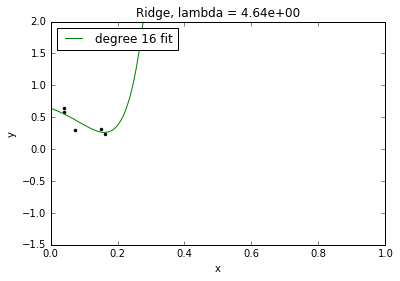

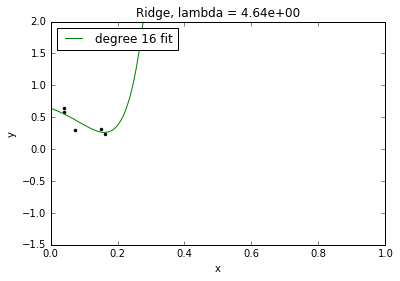

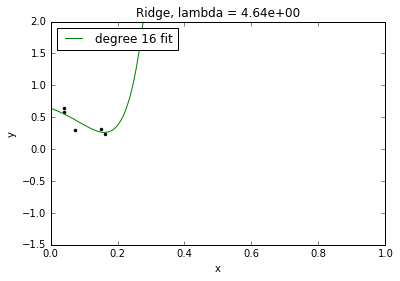

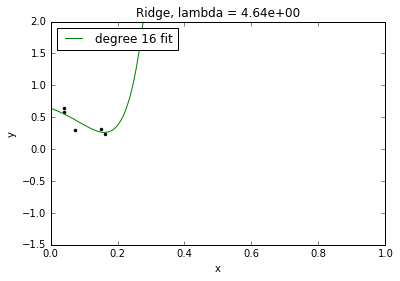

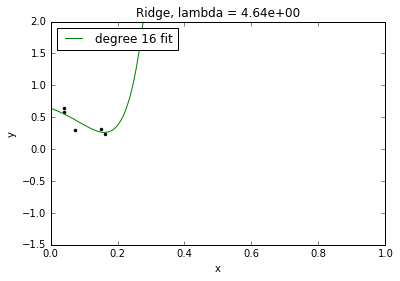

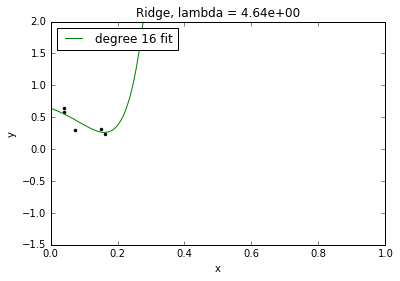

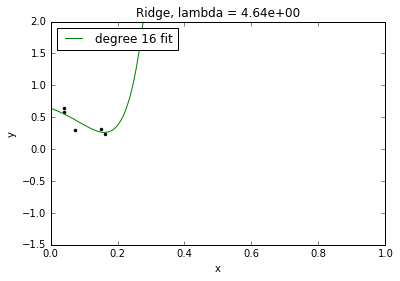

In [158]:
for contk5 in l2_penalty_mse_at2k5:
    model = regressao_polinomial_cume(at2k5, deg=16, l2_penalty=best_l2_penalty)
    print 'lambda = %.2e' % best_l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_predicoes(at2k5,model)
    plt.title('Ridge, lambda = %.2e' % best_l2_penalty_at2k5)

In [159]:
print 'Mse k10: %s\n'% l2_penalty_mse_at2k10
print 'Best k10:%s'%best_l2_penalty_at2k10

Mse k10: [44.43264727445542, 4.991271280885975, 0.18884207637591635, 0.15274913757326808, 0.06026452004483707, 0.09380335170161254, 0.09577337823462125, 0.09582951121350695, 0.09583107418281206, 0.0958311176741655]

Best k10:166.81005372


lambda = 1.29e-01
Coeficientes de primeiro grau 16:
       16        15        14        13        12        11         10
-1186 x  - 2474 x  - 5020 x  - 9793 x  - 8572 x  - 2605 x  - 616.8 x 
         9         8         7        6         5        4         3
 - 36.9 x + 84.12 x + 77.85 x + 49.6 x + 26.76 x + 12.6 x + 4.708 x
          2
 + 0.509 x - 1.02 x + 0.5384


lambda = 1.29e-01
Coeficientes de primeiro grau 16:
       16        15        14        13        12        11         10
-1186 x  - 2474 x  - 5020 x  - 9793 x  - 8572 x  - 2605 x  - 616.8 x 
         9         8         7        6         5        4         3
 - 36.9 x + 84.12 x + 77.85 x + 49.6 x + 26.76 x + 12.6 x + 4.708 x
          2
 + 0.509 x - 1.02 x + 0.5384


lambda = 1.29e-01
Coeficientes de primeiro grau 16:
       16        15        14        13        12        11         10
-1186 x  - 2474 x  - 5020 x  - 9793 x  - 8572 x  - 2605 x  - 616.8 x 
         9         8         7        6         5        4   

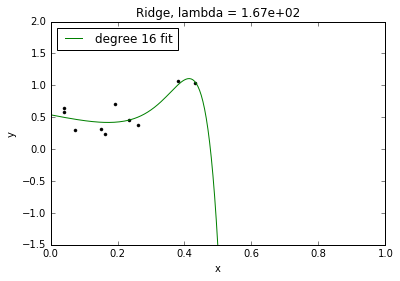

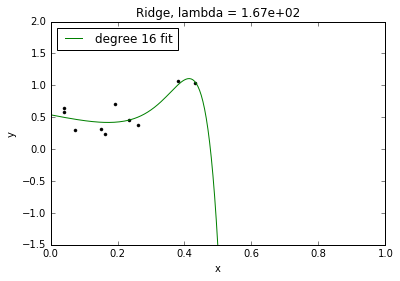

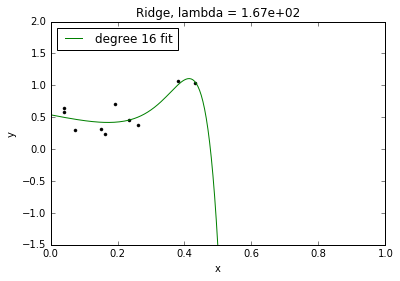

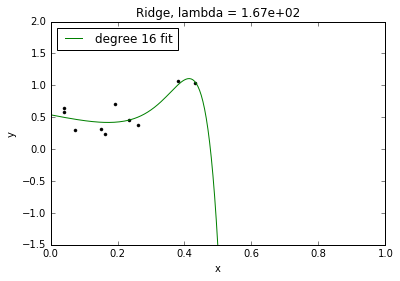

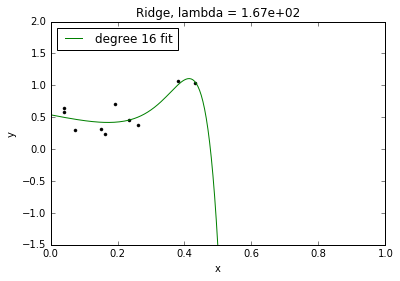

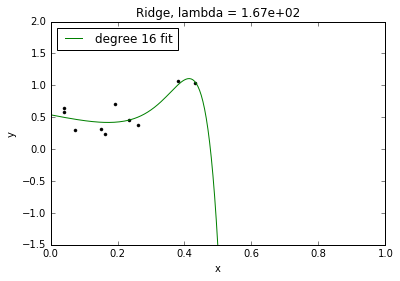

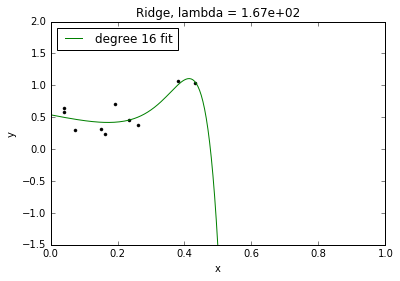

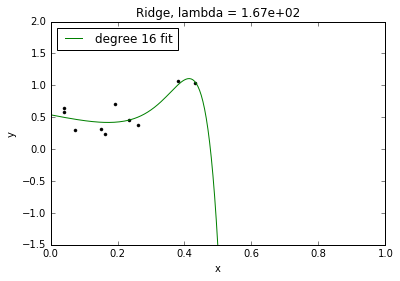

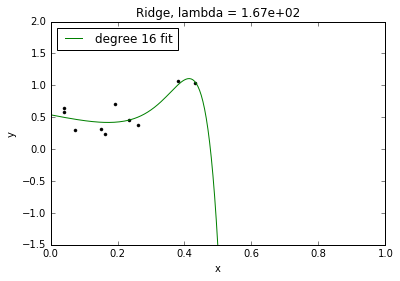

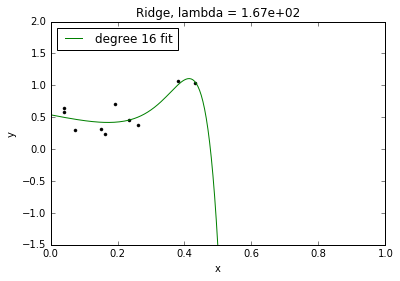

In [160]:
for contk10 in l2_penalty_mse_at2k5:
    model = regressao_polinomial_cume(at2k10, deg=16, l2_penalty=best_l2_penalty)
    print 'lambda = %.2e' % best_l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_predicoes(at2k10,model)
    plt.title('Ridge, lambda = %.2e' % best_l2_penalty_at2k10)